In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
warnings.filterwarnings('ignore')

In [ ]:
x_train_ahcd = pd.read_csv("/csvTrainImages 13440x1024.csv",header=None)
y_train_ahcd = pd.read_csv("/csvTrainLabel 13440x1.csv", header=None, names=["label"], converters={'label': str})

x_test_ahcd = pd.read_csv("/csvTestImages 3360x1024.csv"",header=None)
y_test_ahcd = pd.read_csv("/csvTestLabel 3360x1.csv", header=None, names=["label"], converters={'label': str})


# Preparing the Data

**Preparing the AHCD Data**

In [ ]:
x_train_ahcd.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_ahcd.head() 

,label
0,1
1,1
2,1
3,1
4,1


In [ ]:
y_train_ahcd.value_counts() 

label
1        480
10       480
8        480
7        480
6        480
5        480
4        480
3        480
28       480
27       480
26       480
25       480
24       480
23       480
22       480
21       480
20       480
2        480
19       480
18       480
17       480
16       480
15       480
14       480
13       480
12       480
11       480
9        480
dtype: int64

In [ ]:
y_train_ahcd.value_counts() 

label
1        480
10       480
8        480
7        480
6        480
5        480
4        480
3        480
28       480
27       480
26       480
25       480
24       480
23       480
22       480
21       480
20       480
2        480
19       480
18       480
17       480
16       480
15       480
14       480
13       480
12       480
11       480
9        480
dtype: int64

In [ ]:
x_train_ahcd.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train_ahcd.shape , x_train_ahcd.shape , x_test_ahcd.shape , y_test_ahcd.shape

((13440, 1024), (13440, 1024), (3360, 1024), (3360, 1))

In [ ]:
# Converts a class vector (integers) to binary class matrix.
y_trian_ahcd_hot = to_categorical(y_train_ahcd) 
y_test_ahcd_hot = to_categorical(y_test_ahcd)

In [ ]:
# Converts a class vector (integers) to binary class matrix.
y_trian_ahcd_hot = to_categorical(y_train_ahcd) 
y_test_ahcd_hot = to_categorical(y_test_ahcd)

In [ ]:
# Converting dataframe to list format
# ahcd database
x_train_ahcd_list = x_train_ahcd.values.tolist()[1::]
x_test_ahcd_list = x_test_ahcd.values.tolist()[1::]
y_train_ahcd_list = y_train_ahcd.values.tolist()[1::]
y_test_ahcd_list = y_test_ahcd.values.tolist()[1::]

In [ ]:
# Reshape the 1024 pixel to 32 * 32
x_train_ahcd_reshape = x_train_ahcd.values.reshape(-1,32,32,1)
x_test_ahcd_reshape = x_test_ahcd.values.reshape(-1,32,32,1)

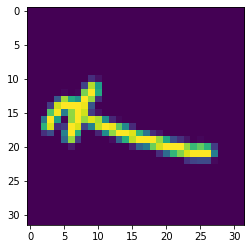

label    1
Name: 0, dtype: object


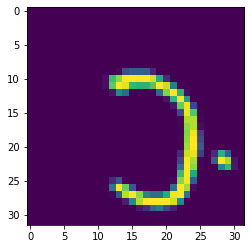

label    2
Name: 10, dtype: object


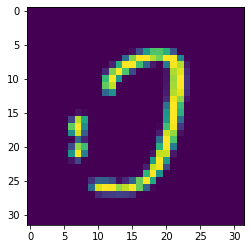

label    3
Name: 20, dtype: object


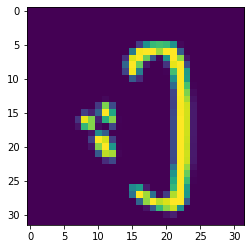

label    4
Name: 30, dtype: object


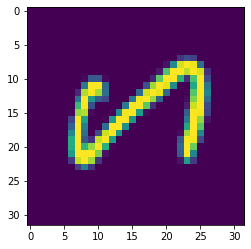

label    6
Name: 40, dtype: object


In [ ]:
for i in range(0,50,10):
    plt.imshow(x_train_ahcd_reshape[i])
    plt.show()
    print(y_train_ahcd.iloc[i])

****

# K-nearest neighbors (KNNs) using  AHCD

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn_ahcd = KNeighborsClassifier(n_neighbors=7)
knn_ahcd.fit(x_train_ahcd_list, y_train_ahcd_list)
y_pred_ahcd = knn_ahcd.predict(x_test_ahcd_list)

**Model Evaluation**

In [ ]:
print("AHCD DataBase Accuracy:", metrics.accuracy_score(y_test_ahcd_list, y_pred_ahcd))

AHCD DataBase Accuracy: 0.5132479904733551


****

# Convolutional Neural Network (CNN)

In [ ]:
model = Sequential([
  layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,1)),
  layers.BatchNormalization(),
  layers.MaxPool2D(pool_size=2),
  layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(pool_size=2),
  layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(pool_size=2),
  layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPool2D(pool_size=2),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(29, activation='relu', name="outputs"),
])

model2.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(0.0001), 
                  metrics=['accuracy'])

earlystop = keras.callbacks.EarlyStopping(patience=50, monitor='val_accuracy', restore_best_weights=True)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        80        
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)         

In [ ]:

history1 = model1.fit(x=x_train_ahcd_reshape, y=y_trian_ahcd_hot, batch_size=32, epochs=1000, validation_data=(x_test_ahcd_reshape, y_test_ahcd_hot), callbacks=[earlystop])

Epoch 1/1000


2022-12-30 21:14:03.819370: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


420/420 [==============================] - 9s 5ms/step - loss: 6.4908 - accuracy: 0.0423 - val_loss: 4.2721 - val_accuracy: 0.0542
Epoch 2/1000
420/420 [==============================] - 2s 5ms/step - loss: 4.4129 - accuracy: 0.0408 - val_loss: 3.2864 - val_accuracy: 0.0685
Epoch 3/1000
420/420 [==============================] - 2s 4ms/step - loss: 3.7725 - accuracy: 0.0432 - val_loss: 3.2506 - val_accuracy: 0.0711
Epoch 4/1000
420/420 [==============================] - 2s 4ms/step - loss: 3.5239 - accuracy: 0.0519 - val_loss: 3.2042 - val_accuracy: 0.1506
Epoch 5/1000
420/420 [==============================] - 2s 4ms/step - loss: 3.4174 - accuracy: 0.0571 - val_loss: 3.1899 - val_accuracy: 0.1574
Epoch 6/1000
420/420 [==============================] - 2s 5ms/step - loss: 3.3212 - accuracy: 0.0708 - val_loss: 3.1053 - val_accuracy: 0.1643
Epoch 7/1000
420/420 [==============================] - 2s 6ms/step - loss: 3.2428 - accuracy: 0.0946 - val_loss: 2.9773 - val_accuracy: 0.2071
Epoch

Text(0.5, 1.0, 'Accuracy Curves')

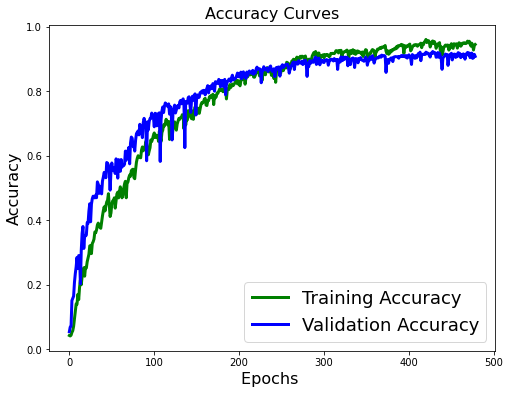

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'g',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)